# XUV 300 Case study for Thane Circle

Problem Statement:
For period of Feb19 to Sept.19, XUV300 market share in Thane circle is low which is around 20% against the target of 40%. Through this study wanted to analyse which are those significant factors driving the growth of MF XUV retail in Thane circle.

Based on the domain knowledge, Project team has identified key factors driving the growth of XUV300 MF retail in Thane circle such as 
'No.of_Counter', 'No.of_Executives', 'Years of Experience_In months','D_Payout_Count', 'S_Payout_count ', 'TA_Avg', 'IFTA_days_Regular',.
     

### Importing and Understanding Data

In [63]:
#importing essential libraries
import pandas as pd
import numpy as np

In [64]:
# Importing XUV300.csv
XUV300 = pd.read_csv(r"C:\Users\23166622\Desktop\Auto-XUV 300\Machine Learning\MLR -2\XUV300.csv")

In [65]:
# Looking at the first five rows
XUV300.head()

,DEALERSHIPS_NAME,Year_of_Association,No.of_Counter,No.of_Executives,Years of Experience_In months,D_Payout_Count,S_Payout_count,TA_Avg,IFTA_days_Regular,MF_Retail
0,AAKASH AUTOMOTIVES - DHULE (A010871),19,2,2,88,12,11,23704125.0,45,28
1,ACCORD MOTORS,14,3,3,36,13,12,37313875.0,45,19
2,AHUJA AUTO ABHIKARAN,2,2,2,18,0,0,14814250.0,45,0
3,AMBER AUTOMOBILES -AS,6,4,4,19,11,11,45612500.0,45,20
4,AMBER AUTOMOTIVES,1,3,2,18,13,9,25712500.0,45,15


In [66]:
XUV300.describe()

,Year_of_Association,No.of_Counter,No.of_Executives,Years of Experience_In months,D_Payout_Count,S_Payout_count,TA_Avg,IFTA_days_Regular,MF_Retail
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,7.400000e+01,74.000000,74.000000
mean,10.581081,2.864865,3.364865,30.567568,8.662162,7.837838,2.856858e+07,36.891892,18.229730
std,8.011989,2.141081,2.524262,20.820223,8.206708,8.962673,1.935294e+07,12.211120,14.866112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,3.000000,1.000000,1.250000,17.250000,2.250000,0.250000,1.648186e+07,30.000000,8.250000
50%,10.000000,3.000000,3.000000,24.000000,7.000000,6.500000,2.554375e+07,45.000000,14.500000
75%,16.000000,4.000000,4.000000,40.750000,13.000000,11.000000,3.709478e+07,45.000000,24.750000
max,30.000000,11.000000,12.000000,88.000000,42.000000,52.000000,1.137500e+08,45.000000,73.000000


In [67]:
# What type of values are stored in the columns?
XUV300.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 10 columns):
DEALERSHIPS_NAME                 74 non-null object
Year_of_Association              74 non-null int64
No.of_Counter                    74 non-null int64
No.of_Executives                 74 non-null int64
Years of Experience_In months    74 non-null int64
D_Payout_Count                   74 non-null int64
S_Payout_count                   74 non-null int64
TA_Avg                           74 non-null float64
IFTA_days_Regular                74 non-null int64
MF_Retail                        74 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 5.9+ KB


#Data Visualisation

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

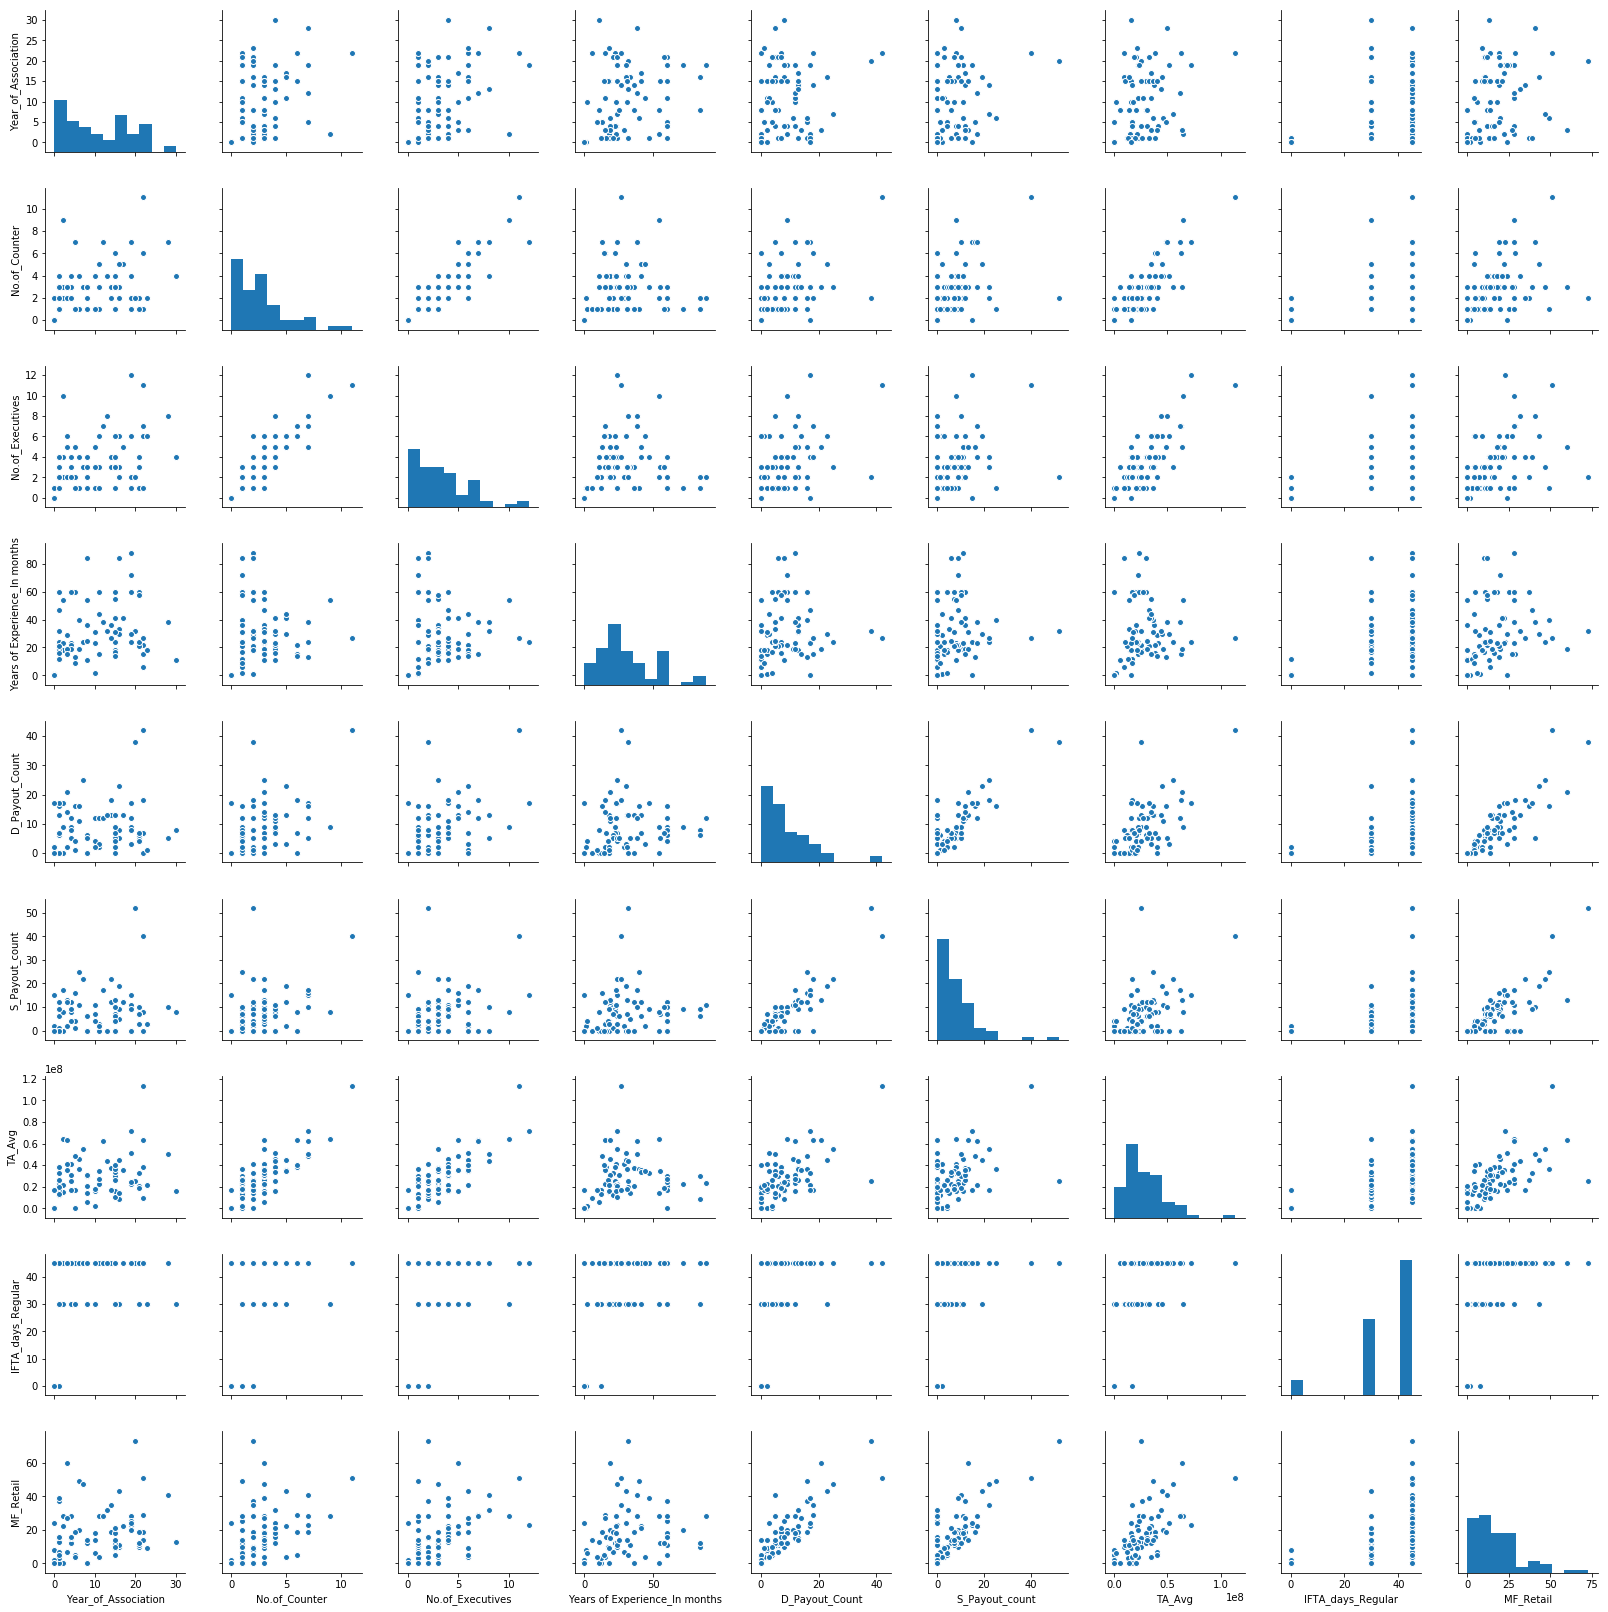

In [69]:
sns.pairplot(XUV300)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

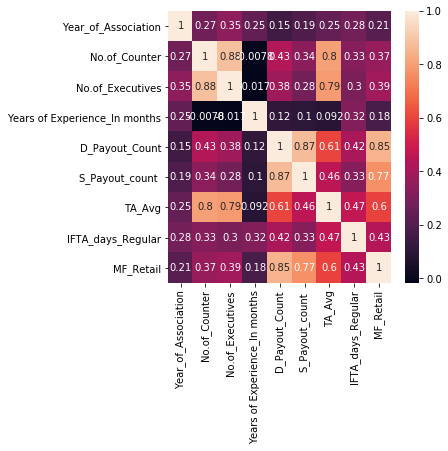

In [71]:
plt.figure(figsize = (5,5))
sns.heatmap(XUV300.corr(),annot = True)

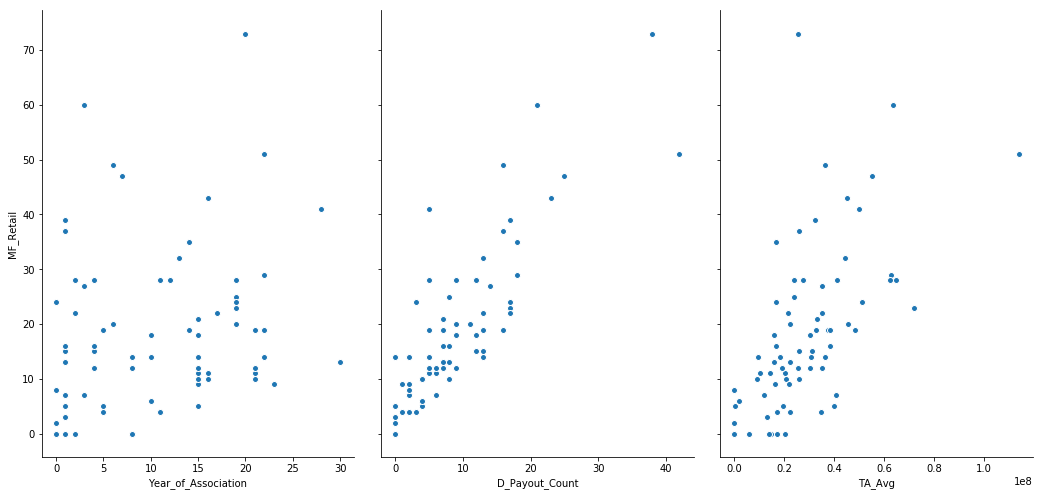

In [72]:
sns.pairplot(XUV300, x_vars=['Year_of_Association','D_Payout_Count','TA_Avg'], y_vars='MF_Retail',size=7, aspect=0.7, kind='scatter')

In [73]:
XUV300.drop(['DEALERSHIPS_NAME'],axis =1, inplace =True)

### Data Preparation

In [74]:
XUV300.head()

,Year_of_Association,No.of_Counter,No.of_Executives,Years of Experience_In months,D_Payout_Count,S_Payout_count,TA_Avg,IFTA_days_Regular,MF_Retail
0,19,2,2,88,12,11,23704125.0,45,28
1,14,3,3,36,13,12,37313875.0,45,19
2,2,2,2,18,0,0,14814250.0,45,0
3,6,4,4,19,11,11,45612500.0,45,20
4,1,3,2,18,13,9,25712500.0,45,15


### Rescaling the Features 
It is extremely important to rescale the variables so that they have a comparable scale. 
There are twocoon ways of rescaling 
1. Normalisation (min-max scaling) and 
2. standardisation (mean-o, sigma-1) 
Let's try normalisation

In [75]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
XUV300 = XUV300.apply(normalize) 

## Splitting Data into Training and Testing Sets

In [76]:
XUV300.columns

Index(['Year_of_Association', 'No.of_Counter', 'No.of_Executives',
       'Years of Experience_In months', 'D_Payout_Count', 'S_Payout_count ',
       'TA_Avg', 'IFTA_days_Regular', 'MF_Retail'],
      dtype='object')

In [77]:
# Putting feature variable to X
X = XUV300[['Year_of_Association','No.of_Counter', 'No.of_Executives', 'Years of Experience_In months',
       'D_Payout_Count', 'S_Payout_count ', 'TA_Avg', 'IFTA_days_Regular']]

# Putting response variable to y
y = XUV300['MF_Retail']

In [78]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

## Building a linear model

### Checking VIF

In [79]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [80]:
# Calculating Vif value|
#vif_cal(input_data=XUV300, dependent_col="MF_Retail")

In [81]:
#RFE
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [82]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 5)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[ True  True False False  True  True  True False]
[1 1 2 3 1 1 1 4]


In [83]:
col = X_train.columns[rfe.support_]

In [84]:
print(col)

Index(['Year_of_Association', 'No.of_Counter', 'D_Payout_Count',
       'S_Payout_count ', 'TA_Avg'],
      dtype='object')


In [85]:
#Building model using sklearn
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [86]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [87]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [88]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              MF_Retail   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     34.16
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           2.98e-14
Time:                        10:05:57   Log-Likelihood:                 49.515
No. Observations:                  51   AIC:                            -87.03
Df Residuals:                      45   BIC:                            -75.44
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0078    

In [89]:
vif_cal(input_data=XUV300, dependent_col="MF_Retail")

,Var,Vif
2,No.of_Executives,15.60
1,No.of_Counter,15.08
6,TA_Avg,14.84
4,D_Payout_Count,12.33
5,S_Payout_count,8.16
7,IFTA_days_Regular,7.92
3,Years of Experience_In months,3.70
0,Year_of_Association,3.63


In [90]:
# Now let's use our model to make predictions.

# Creating X_test_6 dataframe by dropping variables from X_test
X_test_rfe = X_test[col]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm.predict(X_test_rfe)

In [91]:
# Now let's check how well our model is able to make predictions.

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0,0.5,'y_pred')

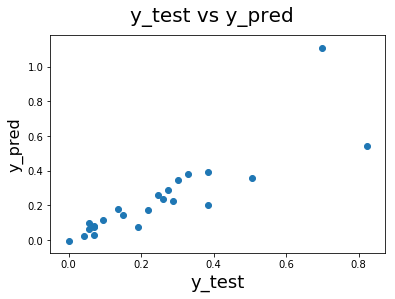

In [92]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

C:\Users\23166622\Python\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Index')

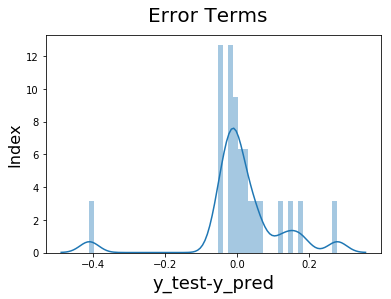

In [93]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)                          # Y-label

In [94]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.12022919881992057


# Building Model with 2 significant variable

In [95]:
# Running RFE with the output number of the variable equal to 9
lm = LinearRegression()
rfe = RFE(lm, 3)             # running RFE
rfe = rfe.fit(X_train, y_train)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)  

[False False False False  True  True  True False]
[3 2 4 5 1 1 1 6]


In [96]:
col = X_train.columns[rfe.support_]

In [97]:
print(col)

Index(['D_Payout_Count', 'S_Payout_count ', 'TA_Avg'], dtype='object')


In [98]:
#Building model using sklearn
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [99]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [100]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [101]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              MF_Retail   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     53.70
Date:                Tue, 12 Nov 2019   Prob (F-statistic):           3.22e-15
Time:                        10:05:59   Log-Likelihood:                 47.475
No. Observations:                  51   AIC:                            -86.95
Df Residuals:                      47   BIC:                            -79.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0107      0.028     

In [102]:
# Now let's use our model to make predictions.

# Creating X_test_6 dataframe by dropping variables from X_test
X_test_rfe = X_test[col]

# Adding a constant variable 
X_test_rfe = sm.add_constant(X_test_rfe)

# Making predictions
y_pred = lm.predict(X_test_rfe)

In [103]:
# Now let's check how well our model is able to make predictions.

# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0,0.5,'y_pred')

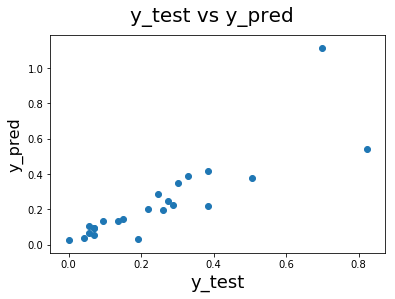

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [105]:
# Now let's check the Root Mean Square Error of our model.
import numpy as np
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.12289632713083959
